In [1]:
import mysql.connector
import matplotlib
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import pandas as pd

In [92]:
remote.close()

In [2]:
remote = mysql.connector.connect(
    host = "database-1.***********.rds.amazonaws.com", #insert sql path 
    port = 3306,
    user = "eda",
    password = "***********",
    database= 'eda'
)
cur = remote.cursor(buffered=True)

In [28]:
#전국 서울 경기도 제외
# sql = """ select city, year, month,pop_sum from population where city!='전국' and city!='서울특별시' and city!='경기도' 
#     and month='01' and (year='2008'or year='2012' or year='2016' or year='2020' or year='2024')
#         ; 
#     """

# 서울 경기도 
# sql = """ select city, year, month,pop_sum from population where city!='전국' and (city='서울특별시' or city='경기도' or city='인천광역시') 
#     and month='01' and (year='2008'or year='2012' or year='2016' or year='2020' or year='2024')
#         ; 
#     """

sql = """ select city, year, month,pop_sum from population where city!='전국'  
    and month='01' and year between 2007 and 2024
        ; 
    """

cur.execute(sql)
result = cur.fetchall()
# for line in result:
#     print(line)

    # remote.commit()

In [29]:
korea_df=pd.DataFrame(result,columns=['city','year','month','pop'])

In [30]:
korea_df.tail()

,city,year,month,pop
279,전라북도,2024,01,1752921
280,전라남도,2024,01,1802672
281,경상북도,2024,01,2551370
282,경상남도,2024,01,3248703
283,제주특별자치도,2024,01,674353


In [16]:
len(korea_df['city'].unique())

17

In [17]:
korea_df['date']=korea_df['year']+korea_df['month']

In [18]:
korea_df.head()

,city,year,month,pop,date
0,서울특별시,2008,01,10201656,200801
1,부산광역시,2008,01,3587154,200801
2,대구광역시,2008,01,2494690,200801
3,인천광역시,2008,01,2668424,200801
4,광주광역시,2008,01,1414877,200801


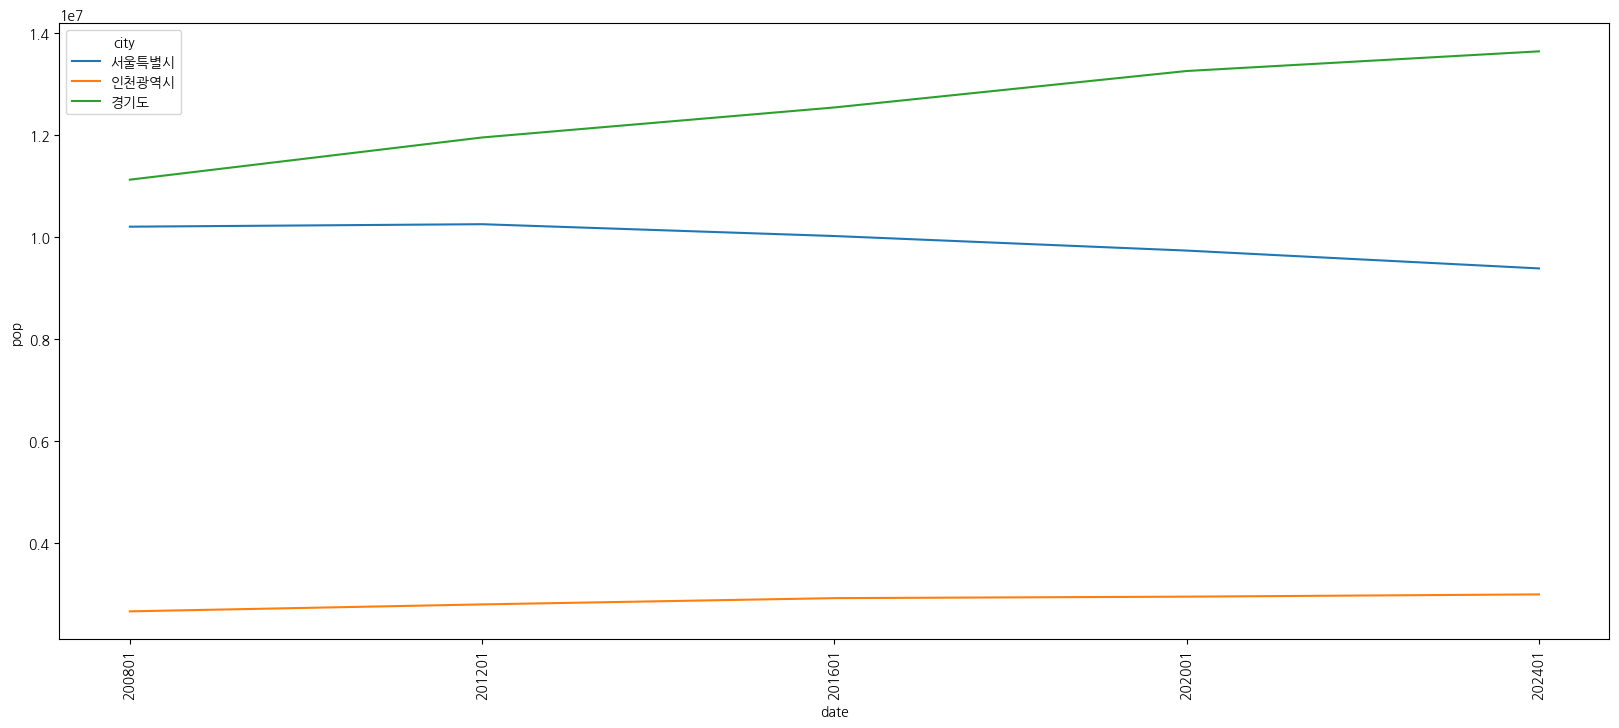

In [10]:
plt.figure(figsize=(20,8))
line_plot=sns.lineplot(data=korea_df,x='date',y='pop',hue='city')
plt.xticks(rotation=90)


plt.show()

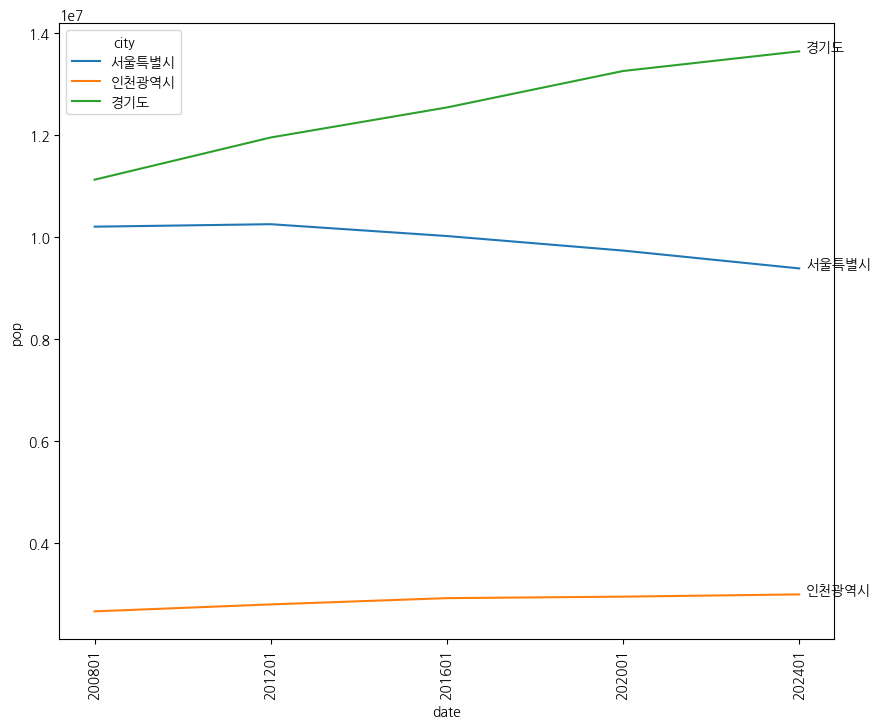

In [11]:
plt.figure(figsize=(10,8))
line_plot=sns.lineplot(data=korea_df,x='date',y='pop',hue='city')
plt.xticks(rotation=90)
for line, name in zip(line_plot.get_lines(), korea_df["city"].unique()):
    y_values = line.get_ydata()[-1]
    x_values = line.get_xdata()[-1]
    line_plot.annotate(name, (x_values, y_values), xytext=(5, 0), textcoords="offset points")

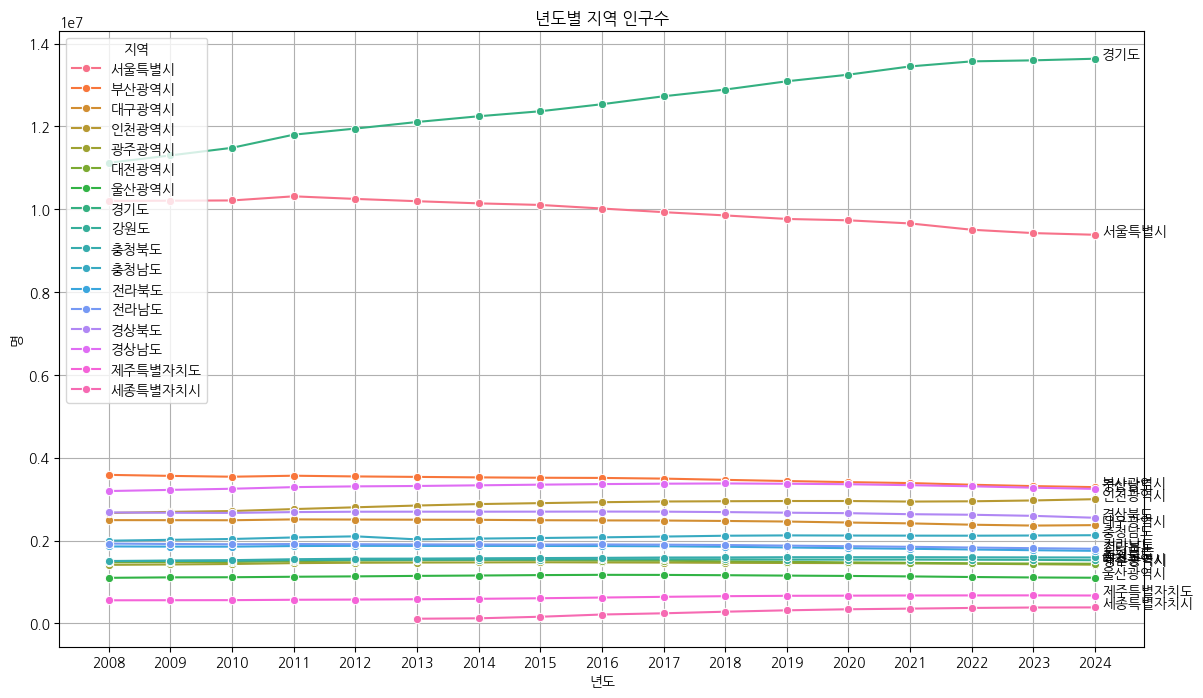

In [31]:
plt.figure(figsize=(14,8))
line_plot = sns.lineplot(data=korea_df, x='year', y='pop', hue='city', marker = 'o')
for line, name in zip(line_plot.get_lines(), korea_df["city"].unique()):
    y_values = line.get_ydata()[-1]
    x_values = line.get_xdata()[-1]
    line_plot.annotate(name, (x_values, y_values), xytext=(5, 0), textcoords="offset points")
plt.title('년도별 지역 인구수')
plt.xlabel('년도')
plt.ylabel('명')
plt.xticks(korea_df['year'].unique())
plt.grid(True)
plt.legend(title='지역', loc = 'upper left')
plt.show()

In [ ]:
13~22 경기 설울

In [23]:
# 서울 경기도 
sql = """ select city, year, month,pop_sum from population where city!='전국' and (city='서울특별시' or city='경기도') 
    and month='01' and (year between 2013 and 2022)
        ; 
    """

cur.execute(sql)
result = cur.fetchall()
# for line in result:
#     print(line)

    # remote.commit()

korea_df=pd.DataFrame(result,columns=['city','year','month','pop'])
korea_df.head()

,city,year,month,pop
0,서울특별시,2013,01,10195064
1,경기도,2013,01,12107216
2,서울특별시,2014,01,10143164
3,경기도,2014,01,12245960
4,서울특별시,2015,01,10104515


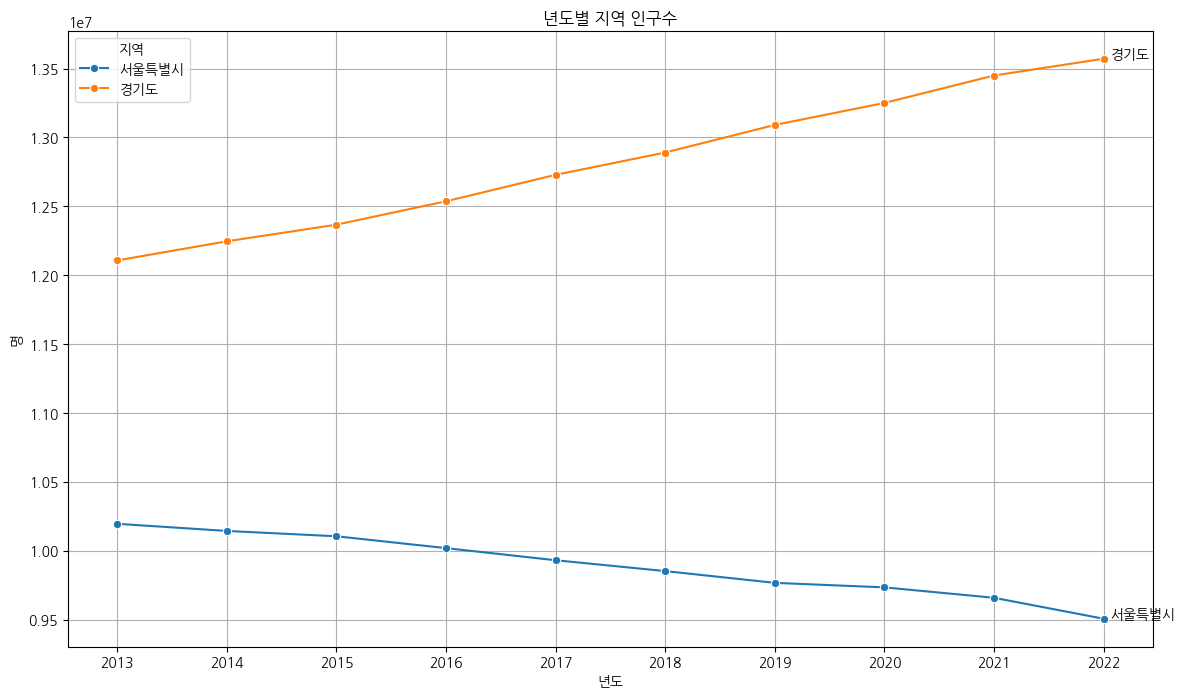

In [24]:
plt.figure(figsize=(14,8))
line_plot = sns.lineplot(data=korea_df, x='year', y='pop', hue='city', marker = 'o')
for line, name in zip(line_plot.get_lines(), korea_df["city"].unique()):
    y_values = line.get_ydata()[-1]
    x_values = line.get_xdata()[-1]
    line_plot.annotate(name, (x_values, y_values), xytext=(5, 0), textcoords="offset points")
plt.title('년도별 지역 인구수')
plt.xlabel('년도')
plt.ylabel('명')
plt.xticks(korea_df['year'].unique())
plt.grid(True)
plt.legend(title='지역', loc = 'upper left')
plt.show()